![for sale image, from https://jpc-chicago.com/for-sale-signs-make-custom-real-estate-signs-and-sale-yard-sign/](images/forsale.jpg)

# Recommending "Offer Price" for First-Time Home Buyers
**Author:** Shawn Samuel
***

## Overview

This project has tasked us to formulate a business project around a given data set. The data set describes house sales over a 1 year period in King County, USA. I have decided to develop a price prediction tool for a real estate agency that focuses on the needs of home buyers. I will be cleaning the data, testing various transformations like log transformation for continuous variables, one hot encoding for categorical variables, and scaling to prepare the data for multiple linear regression models. We were able to build statistically significant model that could explain 51.3% of the variation in prices from our prediciton and strongly feel that further development will lead to a more accurate tool that can be extremely useful for buyer real estate agents assisting first-time home buyers.

## Business Problem

The housing market is booming! With decreased mortgage rates, increased demand and decreased supply - housing prices are also sky high. According to the New York Times, typically 55% to 70% of American home buyers are selling one home and buying another, with the remainder buying a home for the first time. However in recent months, the number of first-time buyers has sharply risen. This leads to increased demand without an equivalent increase in supply. 

I have been tasked with helping first-time home buyers with one of the crucial elements of home buying - determining an 'offer price'. There can be many factors that contribute to this. And being first time home buyers, it can be daunting to figure out what this magic price should be. 

This important price point is often guided buy Buyer's Real Estate Agent and this data driven prediction tool is being built for one such Agency. I will use the historical data of houses sold in King County, Washington to predict the best asking price based on relevant factors.

## Data Understanding

The data set ('kc_house_data.csv') describes house sales in King County, Washington, USA (which includes the city of Seattle) between 2014 and 2015. There are 21,597 rows of entries across 21 columns, including the target variable 'price'. The dependant variables include information about individual homes that have been sold such as square footage, year built, and many more details. 

We will prepare and explore the data to see which ones have the most impact for asking price determination for first-time home buyers. We will focus on the middle and low end of the market in terms of price, as first time home buyers will likely not be in the luxury home market.

## Data Preparation & Initial Model

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #to format axes
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #supress warnings that don't affect program
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import eli5

import sjs_utilities as sjs #custom functions

In [2]:
#read data set
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
sns.pairplot(df)

In [7]:
#check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#for initial model - dropping columns recommended by the curriculum as well as those with null values
#also dropping sqft_lot as it visually does not seem to correlate

In [9]:
df = df.drop(columns=['id', 'date', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode'])
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1955
1,538000.0,3,2.25,2570,2.0,3,7,1951
2,180000.0,2,1.00,770,1.0,3,6,1933
3,604000.0,4,3.00,1960,1.0,5,7,1965
4,510000.0,3,2.00,1680,1.0,3,8,1987


In [10]:
#sanity check
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64

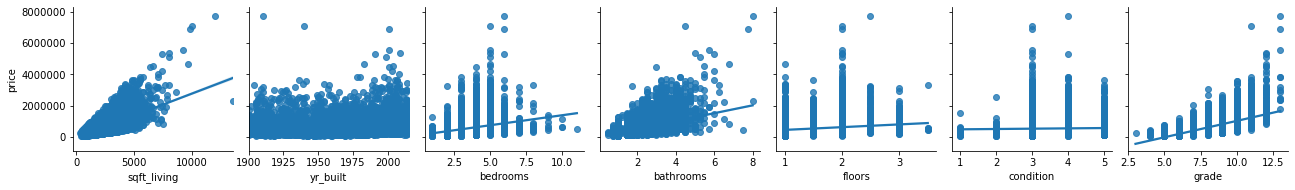

In [56]:
fig, axarr = plt.subplots(7, figsize=(17,35))
sns.pairplot(df, x_vars=['sqft_living', 'yr_built', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], y_vars='price', kind='reg');

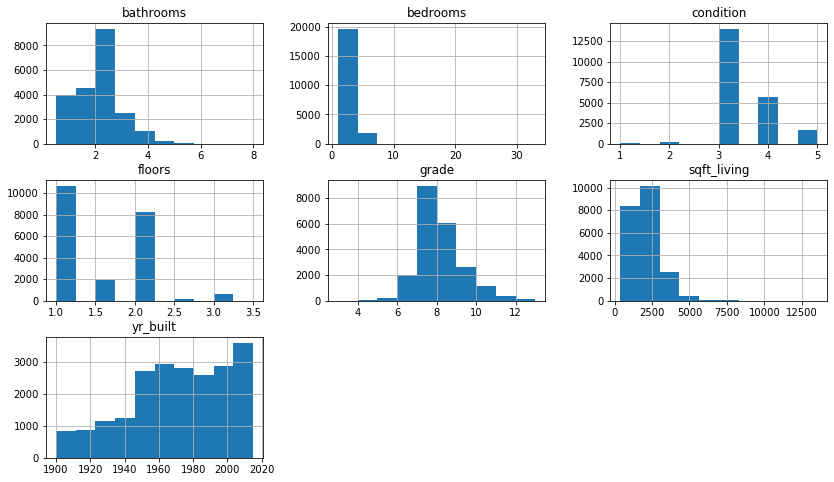

In [12]:
df[['sqft_living', 'yr_built','bedrooms','bathrooms','floors','condition','grade']].hist(figsize  = [14, 8]); 

⮕ Let's build a base model:

Train R2: 0.622
Test R2: 0.603
---
Train MAE: 144572.71
Test MAE: 146023.17
---
Train RMSE: 225273.76
Test RMSE: 233391.92


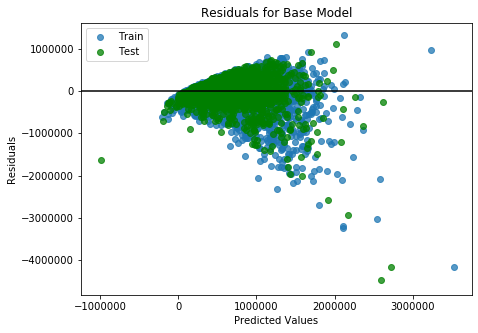

Weight?,Feature
+2356110.583,sqft_living
+1345125.067,grade
+422960.812,bathrooms
+88999.865,condition
+60312.223,floors
-142223.747,<BIAS>
-469262.443,yr_built
-491730.428,bedrooms


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3803.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:58:03   Log-Likelihood:            -2.2261e+05
No. Observations:               16197   AIC:                         4.452e+05
Df Residuals:                   16189   BIC:                         4.453e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.422e+05   1.28e+04    -11.147      0.000   -1.67e+05   -1.17e+05
bedrooms    -4.917e+05   2.52e+04    -19.524      0.000   -5.41e+05   -4.42e+05
bathrooms     4.23e+05    3.1e+04     13.659      0.000    3.62e+05    4.84e+05
sqft_living  2.356e+06   5.14e+04     45.841      0.000    2.26e+06    2.46e+06
floors       6.031e+04   1.03e+04      5.872      0.000    4.02e+04    8.04e+04
condition      8.9e+04   1.18e+04      7.512      0.000    6.58e+04    1.12e+05
grade        1.345e+06   2.57e+04     52.418      0.000    1.29e+06     1.4e+06
yr_built    -4.693e+05   9082.320    -51.668      0.000   -4.87e+05   -4.51e+05
==============================================================================
Omnibus:                    12024.430   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585171.945
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      31.794   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Define X and y
X_cols = [c for c in df.columns.to_list() if c not in ['price']]
X = df[X_cols]
y = df.price
    
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
#instantiate scaler
scaler = MinMaxScaler()
    
#Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
#instantiate linear regression
lr = LinearRegression()
    
#Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)
    
#make training and test predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
    
#calculate residuals
residuals_train = y_train_pred - y_train
residuals_test = y_test_pred - y_test
    
#print train and test R2, MAE, RMSE
print(f"Train R2: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R2: {r2_score(y_test, y_test_pred):.3f}")
print("---")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print("---")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
                    
#risduals plot training and test predictions
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred, residuals_train, alpha=.75, label = "Train")
plt.scatter(y_test_pred, residuals_test, color='g', alpha=.75, label = "Test")
plt.axhline(y=0, color='black')
plt.legend()
plt.title('Residuals for Base Model')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.show()
    
# display feature weights using ELI5
display(eli5.show_weights(lr, feature_names=list(X.columns)))


#display Statsmodels summary
sm_mod = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train_scaled,
                                                     columns=X.columns,
                                                     index=X_train.index))).fit()
results = sm_mod.summary()
results

---
### Data Exploration & Modeling
Now that we have a preliminary model to test against, let's explore the data to see what areas we can try and improve. To model and analyze the data, I created a custom function as a pyfile. The particular model and scaler to be used was defined before the function and options to log, OHE and scale were provided. Within the function, a train/test split was performed for validation. The output included R2, MAE, and RMSE metrics, a risiduals plot, weights of features and a dataframe containing all previous metrics. All of these outputs were used in tandem to analyze the effectiveness of each regression. 

#### Plan Outline: 
➡️ Create a pyfile function for subsequent analysis  
☐ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☐ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

In [14]:
#restore all original columns
#continuous and categorical variables (below) will define features to model
df = pd.read_csv('data/kc_house_data.csv')

In [15]:
#the following are required before initiating the model_analysis function

lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables

Train R2: 0.622
Test R2: 0.606
---
Train MAE: 145603.49
Test MAE: 144470.47
---
Train RMSE: 227542.05
Test RMSE: 226936.63


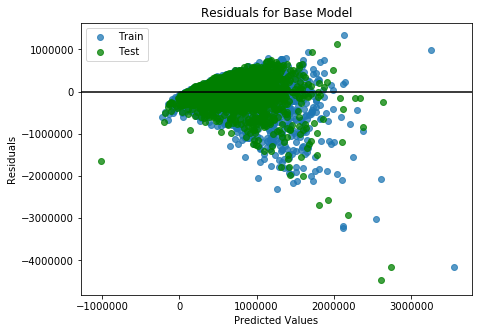

Weight?,Feature
+2356630.177,sqft_living
+1343790.119,grade
+451190.529,bathrooms
+87598.077,condition
+55758.672,floors
-141275.271,<BIAS>
-473962.861,yr_built
-498923.097,bedrooms


,Model Name,R2,MAE,RMSE
0,Base Model,0.606,144470.47,226936.63


In [16]:
#the documentation for the function "sjs.model_analysis" is included
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('Base Model', lr, df, continuous, categoricals, log=False, OHE=False, scale=True)

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
➡️ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☐ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

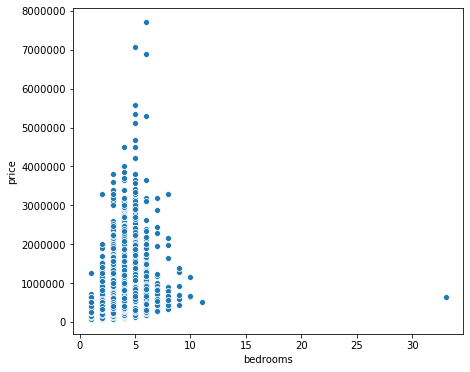

In [17]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['bedrooms'],y=df['price'])

In [18]:
df['bedrooms'].value_counts().sort_values(ascending = False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [19]:
# The 33 bedroom house is extreme. Let's remove it and see how the metrics are affected.

In [20]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [21]:
df = df.drop([0,15856])

In [22]:
#sanity check
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Train R2: 0.621
Test R2: 0.609
---
Train MAE: 148286.55
Test MAE: 143466.52
---
Train RMSE: 233737.61
Test RMSE: 213338.85


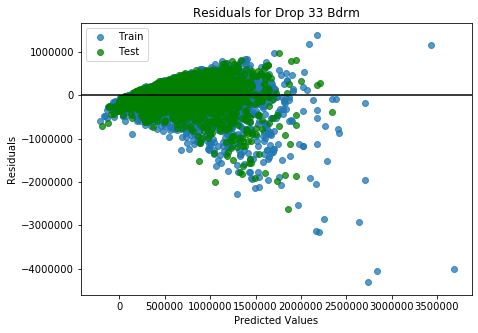

Weight?,Feature
+2657048.990,sqft_living
+1261346.858,grade
+410051.090,bathrooms
+75581.159,condition
+60032.162,floors
-110495.632,<BIAS>
-472346.888,yr_built
-564150.325,bedrooms


,Model Name,R2,MAE,RMSE
1,Drop 33 Bdrm,0.609,143466.52,213338.85
0,Base Model,0.606,144470.47,226936.63


In [23]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('Drop 33 Bdrm', lr, df, continuous, categoricals, log=False, OHE=False, scale=True)

➡️Improvement in all metrics

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
➡️ Log continous variables  
☐ One Hot Encode categorical variables  
☐ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

Train R2: 0.570
Test R2: 0.583
---
Train MAE: 154181.61
Test MAE: 147428.18
---
Train RMSE: 248918.28
Test RMSE: 220297.41


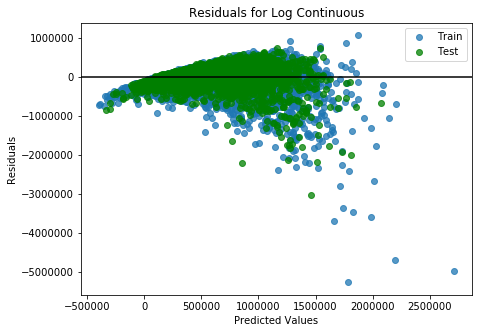

Weight?,Feature
+1776182.492,grade
+869587.825,bathrooms
+613903.882,sqft_living_log
+70286.221,condition
+21570.624,floors
-325893.410,bedrooms
-383531.993,<BIAS>
-541323.759,yr_built_log


,Model Name,R2,MAE,RMSE
2,Log Continuous,0.583,147428.18,220297.41
1,Drop 33 Bdrm,0.609,143466.52,213338.85
0,Base Model,0.606,144470.47,226936.63


In [24]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('Log Continuous', lr, df, continuous, categoricals, log=True, OHE=False, scale=True)

R2 has decreased - and the impact of logged features has decreased

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log & Normalize continous variables  
➡️ One Hot Encode categorical variables  
☐ Create an age columns based on year built and renovation year   
☐ Create a category of within Seattle vs. outside Seattle

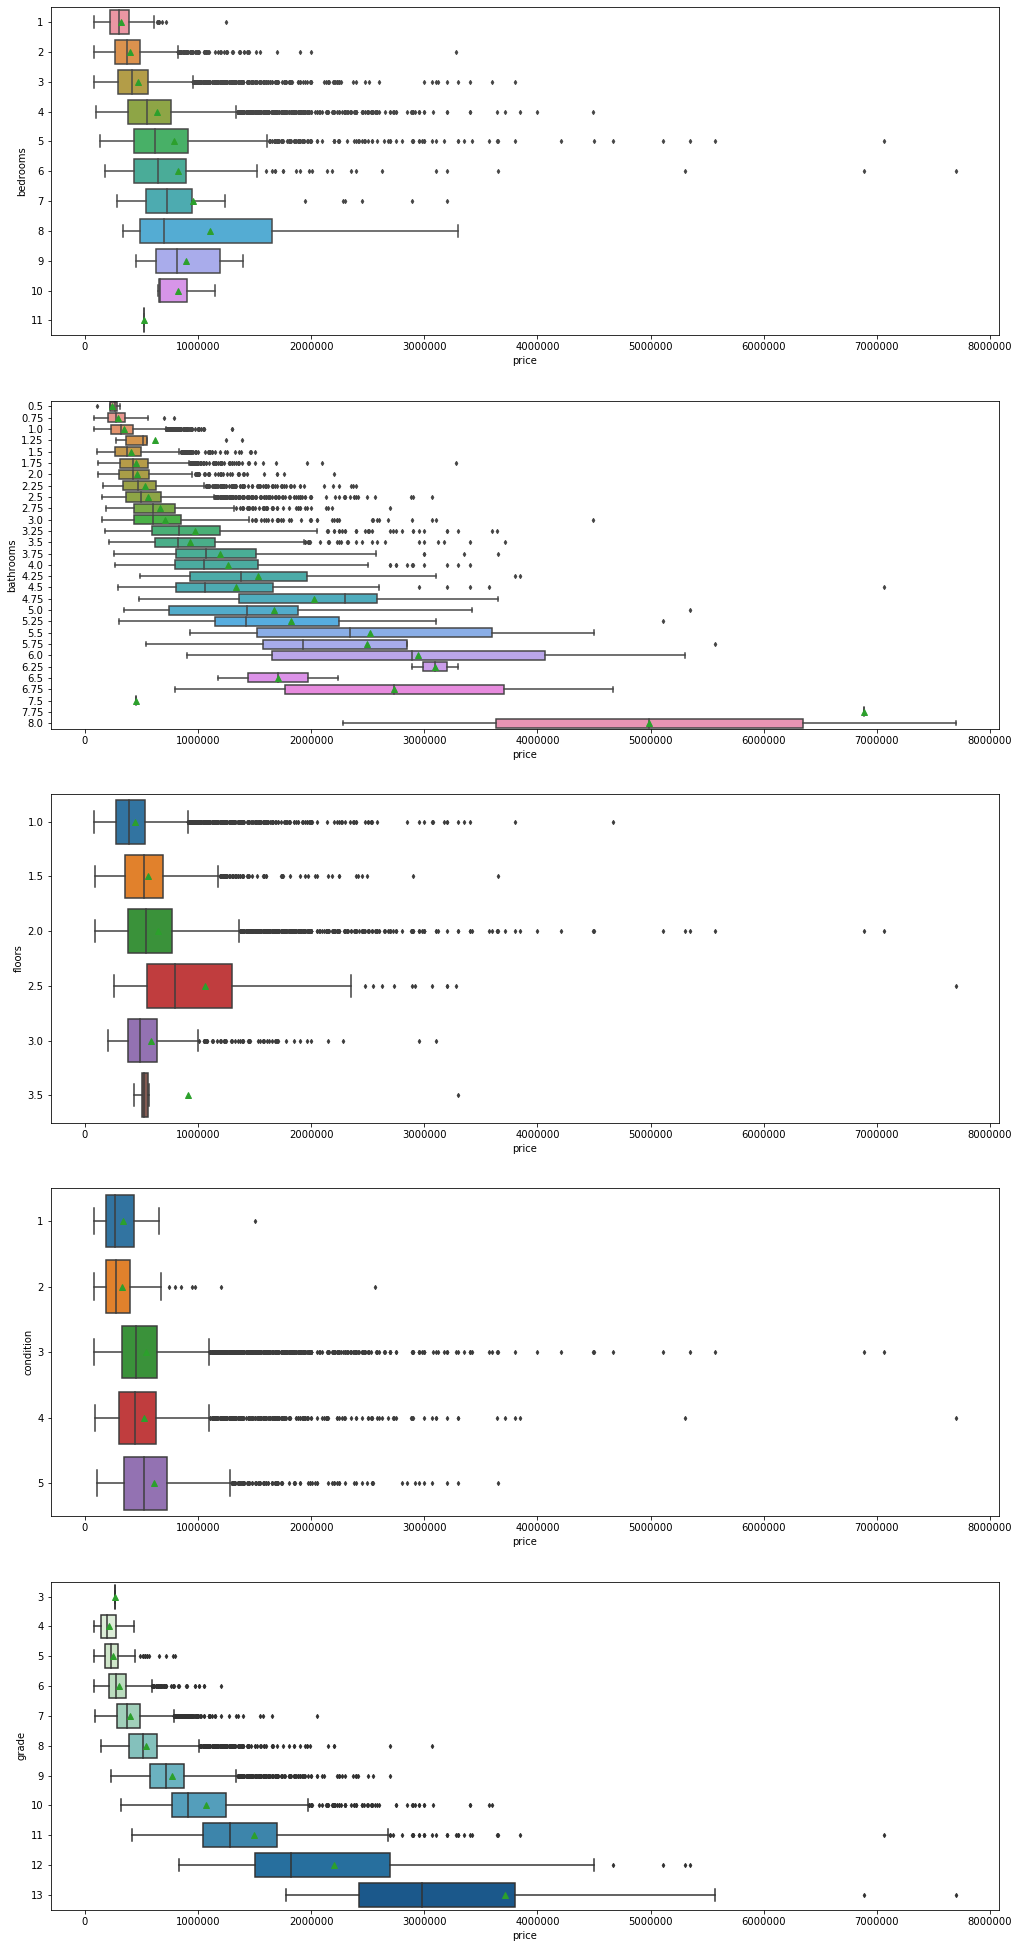

In [138]:
fig, axarr = plt.subplots(5, figsize=(17,35))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'grade', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

Train R2: 0.659
Test R2: 0.594
---
Train MAE: 140320.64
Test MAE: 137320.29
---
Train RMSE: 221634.72
Test RMSE: 217377.62


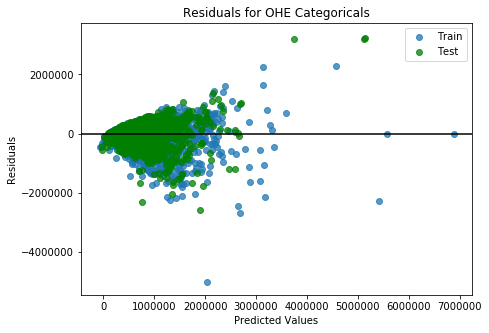

Weight?,Feature
+4670368.494,bathrooms_7.75
+3313243.667,bathrooms_5.75
+2715931.051,bathrooms_8.0
+1808816.872,grade_13
+1441837.190,grade_12
+1336642.266,bathrooms_6.0
+1224372.024,bathrooms_6.25
+1127350.616,bathrooms_6.75
+1078538.455,bathrooms_5.5
+980768.318,bathrooms_4.75


,Model Name,R2,MAE,RMSE
3,OHE Categoricals,0.594,137320.29,217377.62
2,Log Continuous,0.583,147428.18,220297.41
1,Drop 33 Bdrm,0.609,143466.52,213338.85
0,Base Model,0.606,144470.47,226936.63


In [26]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'yr_built'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('OHE Categoricals', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

➡️R2 has decreased but MAE and RMSE have also lowered. Also visual amount of negative predictions have decreased.

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
➡️ Create an age columns based on year built or renovation year   
☐ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

In [27]:
#fill renovation nulls with 0 to assume it hasn't been renovated
df = df.fillna({'yr_renovated':0})

In [28]:
#sanity check
df['yr_renovated'].isna().sum()

0

In [29]:
#check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 1 to 21596
Data columns (total 21 columns):
id               21595 non-null int64
date             21595 non-null object
price            21595 non-null float64
bedrooms         21595 non-null int64
bathrooms        21595 non-null float64
sqft_living      21595 non-null int64
sqft_lot         21595 non-null int64
floors           21595 non-null float64
waterfront       19220 non-null float64
view             21532 non-null float64
condition        21595 non-null int64
grade            21595 non-null int64
sqft_above       21595 non-null int64
sqft_basement    21595 non-null object
yr_built         21595 non-null int64
yr_renovated     21595 non-null float64
zipcode          21595 non-null int64
lat              21595 non-null float64
long             21595 non-null float64
sqft_living15    21595 non-null int64
sqft_lot15       21595 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [30]:
df['age'] = np.where(df['yr_built'] > df['yr_renovated'], 2021-df['yr_built'], 2021-df['yr_renovated'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,30.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,88.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,56.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,34.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,20.0


Train R2: 0.635
Test R2: 0.568
---
Train MAE: 146023.08
Test MAE: 143054.28
---
Train RMSE: 229370.53
Test RMSE: 224208.53


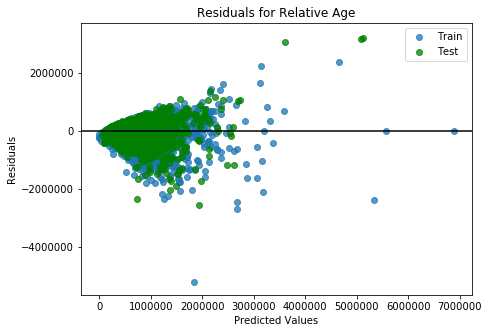

Weight?,Feature
+4583351.178,bathrooms_7.75
+3243082.588,bathrooms_5.75
+2743027.803,bathrooms_8.0
+1739640.613,grade_13
+1343893.273,grade_12
+1299124.746,bathrooms_6.0
+1195043.856,bathrooms_6.25
+1161451.331,bathrooms_6.75
+1049436.808,bathrooms_5.5
+990180.484,sqft_living_log


,Model Name,R2,MAE,RMSE
4,Relative Age,0.568,143054.28,224208.53
3,OHE Categoricals,0.594,137320.29,217377.62
2,Log Continuous,0.583,147428.18,220297.41
1,Drop 33 Bdrm,0.609,143466.52,213338.85
0,Base Model,0.606,144470.47,226936.63


In [31]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('Relative Age', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
☒ Create an age columns based on year built or renovation year   
➡️ Create a category of within Seattle vs. outside Seattle  
☐ Set a price ceiling

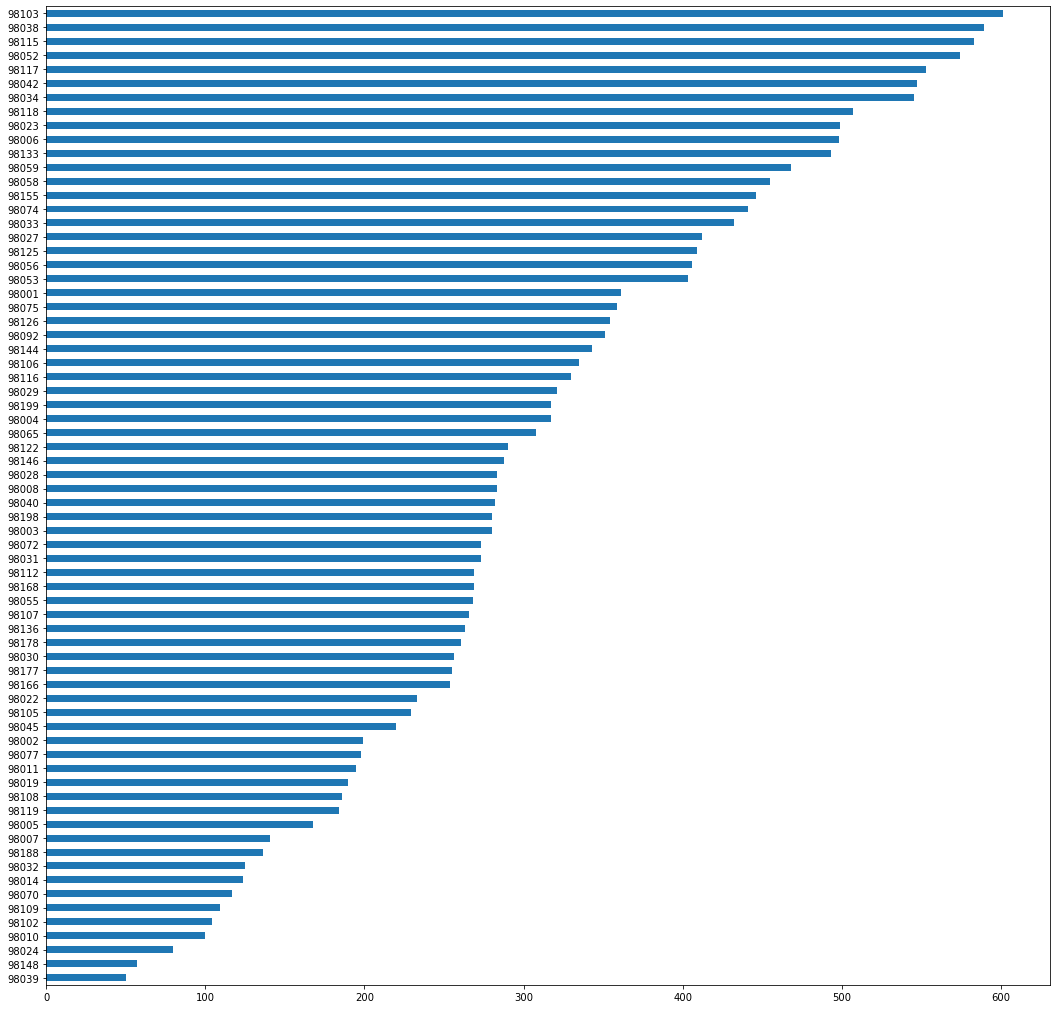

In [32]:
#how many houses there are per zipcode
df['zipcode'].value_counts().sort_values().plot.barh(figsize=(18,18))

In [33]:
#these are the zip codes in Seattle according to https://www.usmapguide.com/washington/seattle-zip-code-map/
seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 
                    98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 
                    98124, 98125, 98126, 98129, 98131, 98132, 98133, 98134, 98136, 98138, 
                    98144, 98145, 98146, 98148, 98151, 98154, 98155, 98158, 98160, 98161, 
                    98164, 98166, 98168, 98170, 98171, 98174, 98177, 98178, 98181, 98184, 
                    98185, 98188, 98190, 98191, 98195, 98198, 98199]

In [34]:
#add binary column for 1 if in Seattle, 0 if not
df['in_seattle'] = np.where(df['zipcode'].isin(seattle_zipcodes), 1, 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,30.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,88.0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,56.0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,34.0,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,20.0,0


In [35]:
len(df[df['in_seattle']==1])/len(df) #about 41.5% of data in Seattle

0.4154202361657791

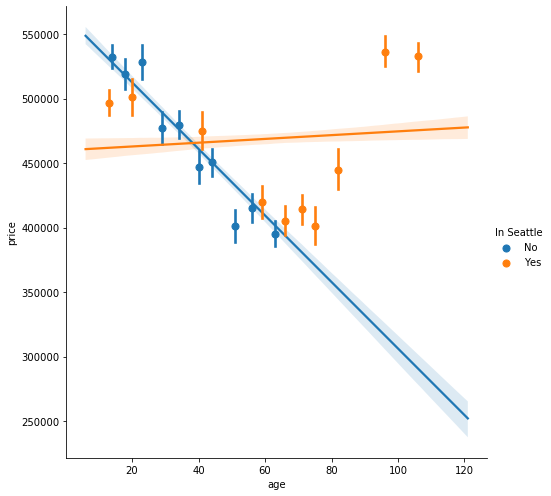

In [189]:
#plot a graph to see the correlation of price and age based on homes within Seattle vs not in Seattle
g=sns.lmplot(x="age", y="price", hue="in_seattle", data=df1, scatter=True, x_bins=10, size=7)
new_title = 'In Seattle'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

➡️Curious trend where houses that are within seattle actually have a trend upwards in price for older homes

Train R2: 0.646
Test R2: 0.582
---
Train MAE: 143091.00
Test MAE: 139842.13
---
Train RMSE: 225866.58
Test RMSE: 220692.77


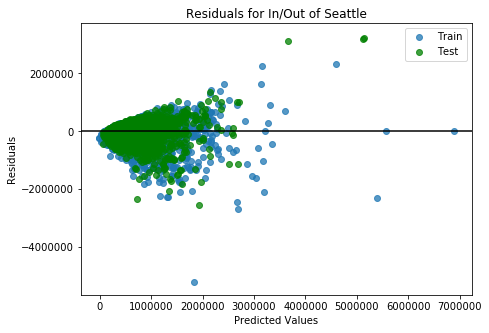

Weight?,Feature
+4615741.723,bathrooms_7.75
+3270838.319,bathrooms_5.75
+2756727.177,bathrooms_8.0
+1627415.742,grade_13
+1312414.587,bathrooms_6.0
+1258525.125,grade_12
+1173043.715,bathrooms_6.25
+1124128.661,bathrooms_6.75
+1055226.273,sqft_living_log
+1045054.624,bathrooms_5.5


,Model Name,R2,MAE,RMSE
5,In/Out of Seattle,0.582,139842.13,220692.77
4,Relative Age,0.568,143054.28,224208.53
3,OHE Categoricals,0.594,137320.29,217377.62
2,Log Continuous,0.583,147428.18,220297.41
1,Drop 33 Bdrm,0.609,143466.52,213338.85
0,Base Model,0.606,144470.47,226936.63


In [36]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade', 'in_seattle'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('In/Out of Seattle', lr, df, continuous, categoricals, log=True, OHE=True, scale=True)

➡️Slight improvement in all 3 metrics

#### Plan Outline:
☒ Create a pyfile function for subsequent analysis  
☒ Identify and tackle outliers (I noticed a bedroom outlier in particular)  
☒ Log continous variables  
☒ One Hot Encode categorical variables  
☒ Create an age columns based on year built or renovation year   
☒ Create a category of within Seattle vs. outside Seattle  
➡️ Set a price ceiling

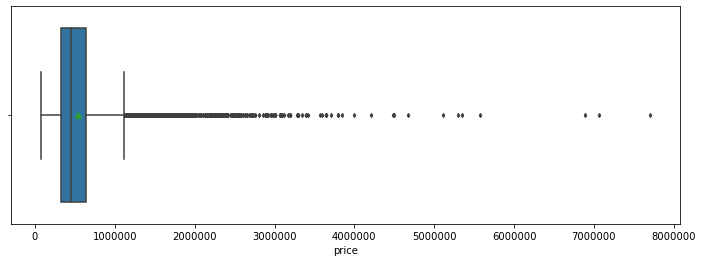

In [37]:
# check boxplot of target
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

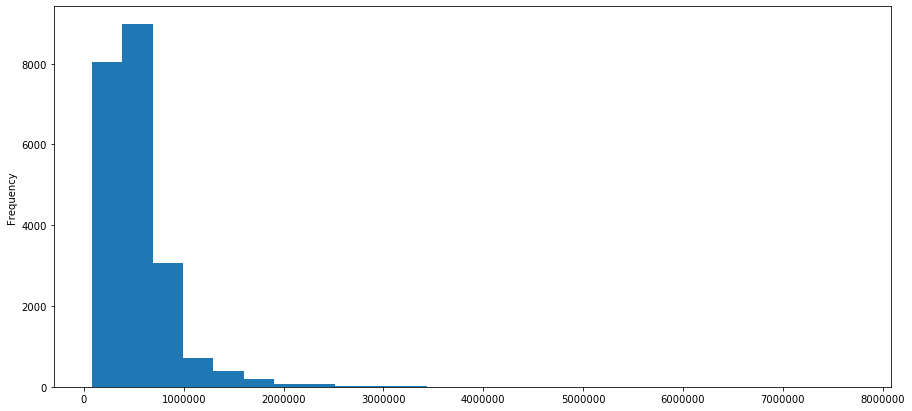

In [38]:
#check distribution
plt.figure(figsize=(15, 7))
df['price'].plot.hist(bins=25)

In [39]:
len(df[df['price']>1000000])/len(df) #approx 1 SD above mean

0.06751562861773559

Our price prediction tool will be limited for use of sub $1M price point - this seems reasonable as it is not something high end users will need and also our data is limited in that area to make accurate predictions, as we can see from risidual plot.

In [40]:
df1 = df[df['price']<1000000]
df1.sort_values(by = 'price').tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle
8507,3425059141,5/28/2014,999000.0,7,4.00,3150,34830,1.0,0.0,0.0,...,0.0,1957,2005.0,98007,47.6029,-122.147,2390,12054,16.0,0
18741,424069112,6/16/2014,999000.0,4,2.75,2800,19168,2.0,NaN,0.0,...,0.0,1992,0.0,98075,47.5911,-122.037,2010,16020,29.0,0
20849,8010100220,10/14/2014,999950.0,4,3.50,3310,4684,2.0,NaN,0.0,...,1020.0,2014,0.0,98116,47.5790,-122.389,1850,4750,7.0,1
9733,686900030,3/23/2015,999950.0,3,2.25,3740,22464,2.0,0.0,0.0,...,1410.0,1966,0.0,98004,47.6354,-122.196,2680,19564,55.0,0
21517,524059322,2/26/2015,999999.0,3,2.50,2100,4097,2.0,0.0,0.0,...,0.0,2008,0.0,98004,47.5983,-122.200,1780,4764,13.0,0


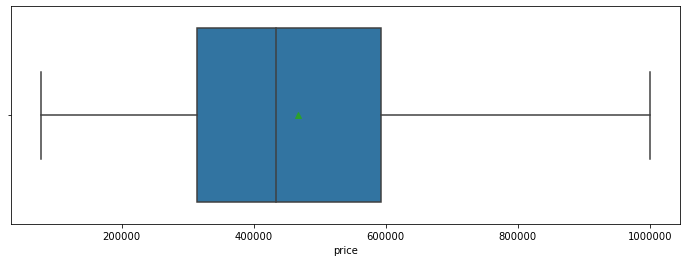

In [41]:
# check boxplot of sub-$1M target
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df1, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

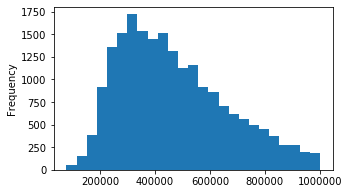

In [42]:
#check distribution of sub-$1M target
plt.figure(figsize=(5, 3))
df1['price'].plot.hist(bins=25)

Train R2: 0.529
Test R2: 0.536
---
Train MAE: 105613.33
Test MAE: 106097.54
---
Train RMSE: 133634.14
Test RMSE: 134302.07


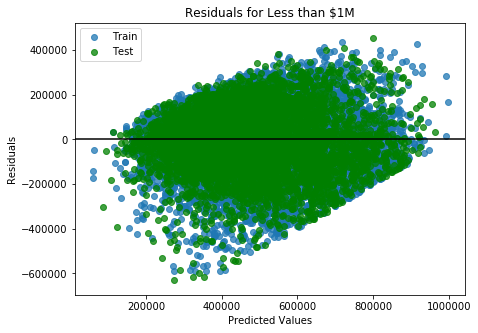

Weight?,Feature
+581876.138,sqft_living_log
+394086.755,grade_11
+344498.697,grade_10
+288361.349,grade_12
+262097.304,grade_9
+196739.611,bathrooms_3.75
+196355.380,bathrooms_6.0
+196144.746,bathrooms_4.25
+194391.321,bathrooms_4.75
+186374.423,bathrooms_3.5


,Model Name,R2,MAE,RMSE
13,Less than $1M,0.536,106097.54,134302.07
12,Less than $1M,0.539,104263.00,132367.53
11,Less than $1M,0.524,106944.26,135736.05
10,Less than $1M,-703255762999541497856.000,112418215509087.58,5193181461049319.00
9,Less than $1M,0.536,106097.54,134302.07
8,Less than $1M,-281736892486418006016.000,41118061886805.80,3264973180967014.00
7,Less than $1M,0.536,106097.54,134302.07
6,Less than $1M,0.513,108614.32,137679.00
5,In/Out of Seattle,0.582,139842.13,220692.77
4,Relative Age,0.568,143054.28,224208.53


In [91]:
lr = LinearRegression() #instantiate fresh model
continuous = ['sqft_living', 'age'] #define continuous variables
categoricals = ['bedrooms','bathrooms','floors','condition','grade', 'in_seattle'] #define categorical variables
model, X, y, X_train, y_train, y_train_pred, y_test_pred = sjs.model_analysis('Less than $1M', lr, df1, continuous, categoricals, log=True, OHE=True, scale=True)

➡️Significantly reduced MAE and RMSE but R2 also went down

## Evaluation

I created 6 models beyond our base model and found that there were varying R2 values ranging from .606 to .513. I found that the last model minimized the MAE and RMSE to the smallest amount. This means that our final model can explain 51.3% of variance in prices. The last model was slightly underfit based on the train vs test. Below we can see the statsmodel summary. Of all of the variables, the following had p values that were significant (less than .05).

sqft_living_log  
age_log	 
bedrooms_2  
bedrooms_3  
bedrooms_4  
bedrooms_5  
bedrooms_6  
bedrooms_7  
bathrooms_3.5  
bathrooms_3.75  
floors_1.5  
floors_2.0  
floors_2.5  
floors_3.0  
condition_5  
grade_9  
grade_10  
grade_11  
in_seattle  

In it's current form, this model is a better predictor of price over the simple mean price of $540,296.60. I believe with further modeling, it be very useful as a tool for first time home-buyers. Based on the train-test split - this model is generalizable and can be used for data not yet seen.

In [85]:
#Let's take a look at the statsmodels OLS summary for our last model

sm_mod = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train,
                                                     columns=X.columns,
                                                     index=X_train.index))).fit()
results = sm_mod.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     283.8
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:58:07   Log-Likelihood:            -1.7810e+05
No. Observations:               13470   AIC:                         3.563e+05
Df Residuals:                   13416   BIC:                         3.567e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.386e+06   1.72e+05     -8.052      0.000   -1.72e+06   -1.05e+06
sqft_living_log  1.953e+05   5816.479     33.572      0.000    1.84e+05    2.07e+05
age_log          4.025e+04   2606.039     15.444      0.000    3.51e+04    4.54e+04
bedrooms_2      -3.332e+04   1.28e+04     -2.611      0.009   -5.83e+04   -8305.961
bedrooms_3      -7.967e+04   1.28e+04     -6.204      0.000   -1.05e+05   -5.45e+04
bedrooms_4      -8.562e+04   1.32e+04     -6.483      0.000   -1.12e+05   -5.97e+04
bedrooms_5      -8.723e+04    1.4e+04     -6.212      0.000   -1.15e+05   -5.97e+04
bedrooms_6      -9.013e+04   1.75e+04     -5.144      0.000   -1.24e+05   -5.58e+04
bedrooms_7      -1.189e+05   3.47e+04     -3.429      0.001   -1.87e+05   -5.09e+04
bedrooms_8      -5.784e+04   6.16e+04     -0.939      0.348   -1.79e+05    6.29e+04
bedrooms_9      -1.683e+05   1.38e+05     -1.216      0.224    -4.4e+05    1.03e+05
bedrooms_10     -4619.6367   9.59e+04     -0.048      0.962   -1.93e+05    1.83e+05
bedrooms_11      1.765e-10   1.23e-09      0.144      0.886   -2.23e-09    2.59e-09
bathrooms_0.75   1.455e+05   9.68e+04      1.503      0.133   -4.43e+04    3.35e+05
bathrooms_1.0    1.252e+05   9.49e+04      1.320      0.187   -6.08e+04    3.11e+05
bathrooms_1.25   1.625e+05   1.16e+05      1.399      0.162   -6.52e+04     3.9e+05
bathrooms_1.5    1.162e+05    9.5e+04      1.223      0.221      -7e+04    3.02e+05
bathrooms_1.75   1.301e+05   9.49e+04      1.371      0.170    -5.6e+04    3.16e+05
bathrooms_2.0    1.331e+05    9.5e+04      1.401      0.161   -5.31e+04    3.19e+05
bathrooms_2.25   1.284e+05    9.5e+04      1.352      0.176   -5.77e+04    3.15e+05
bathrooms_2.5    1.223e+05   9.49e+04      1.288      0.198   -6.38e+04    3.08e+05
bathrooms_2.75   1.532e+05    9.5e+04      1.612      0.107   -3.31e+04    3.39e+05
bathrooms_3.0    1.385e+05   9.52e+04      1.455      0.146    -4.8e+04    3.25e+05
bathrooms_3.25   1.573e+05   9.53e+04      1.651      0.099   -2.95e+04    3.44e+05
bathrooms_3.5    1.864e+05   9.53e+04      1.957      0.050    -335.199    3.73e+05
bathrooms_3.75   1.967e+05   9.71e+04      2.027      0.043    6500.132    3.87e+05
bathrooms_4.0    1.627e+05   9.75e+04      1.668      0.095   -2.85e+04    3.54e+05
bathrooms_4.25   1.961e+05   1.02e+05      1.931      0.053   -2930.252    3.95e+05
bathrooms_4.5    1.577e+05   9.88e+04      1.596      0.110   -3.59e+04    3.51e+05
bathrooms_4.75   1.944e+05   1.64e+05      1.184      0.237   -1.28e+05    5.16e+05
bathrooms_5.0    5.532e+04   1.13e+05      0.490      0.624   -1.66e+05    2.76e+05
bathrooms_5.25  -1.129e-09    1.2e-09     -0.939      0.348   -3.49e-09    1.23e-09
bathrooms_5.5     1.63e+05   1.65e+05      0.985      0.325   -1.61e+05    4.87e+05
bathrooms_5.75   3.767e+04   1.67e+05      0.225      0.822

In [45]:
#Let's see if there is any pattern between predictions that have high residual values

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = df.ix[X_train.index]

In [46]:
df_train['y_train'] = y_train
df_train['y_train'].equals(df_train['price'])

True

In [47]:
df_train['y_pred'] = y_train_pred
df_train['residual'] = df_train['y_pred']-df_train['y_train']
df_train['residual_abs'] = abs(df_train['residual'])

In [48]:
df_train[df_train['residual'] > 300000].sort_values(by = 'residual')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle,y_train,y_pred,residual,residual_abs
8047,3530490031,9/24/2014,202200.0,2,1.75,1330,2159,1.0,0.0,NaN,4,8,1330,0.0,1979,0.0,98198,47.3822,-122.320,1220,3679,42.0,1,202200.0,503041.556173,300841.556173,300841.556173
17515,7300410010,12/4/2014,340000.0,4,2.50,2690,6099,2.0,0.0,0.0,3,9,2690,0.0,1998,0.0,98092,47.3314,-122.171,2520,6168,23.0,0,340000.0,641297.635229,301297.635229,301297.635229
10531,2115720270,4/14/2015,269000.0,2,2.00,1540,5000,1.5,0.0,0.0,3,8,1540,0.0,1986,0.0,98023,47.3190,-122.394,1590,5000,35.0,0,269000.0,570428.026841,301428.026841,301428.026841
3721,9558040820,7/9/2014,570000.0,6,3.75,4000,6015,2.0,NaN,2.0,3,10,3080,920.0,2004,0.0,98058,47.4530,-122.118,3180,5700,17.0,0,570000.0,871660.714051,301660.714051,301660.714051
785,8731901940,3/4/2015,218000.0,5,1.75,1930,8040,1.0,0.0,0.0,4,8,1930,0.0,1966,0.0,98023,47.3109,-122.376,2370,8000,55.0,0,218000.0,520496.396570,302496.396570,302496.396570
14316,8731980880,12/22/2014,340000.0,4,2.25,2180,8000,1.0,0.0,0.0,4,9,1630,550.0,1975,0.0,98023,47.3170,-122.378,2310,8000,46.0,0,340000.0,642726.893917,302726.893917,302726.893917
12548,7298030210,12/23/2014,445000.0,3,2.50,2790,16173,2.0,NaN,0.0,3,10,2790,0.0,1988,0.0,98023,47.3043,-122.343,2890,11632,33.0,0,445000.0,748297.215437,303297.215437,303297.215437
15065,2100200020,12/9/2014,288000.0,5,2.75,2790,4807,1.5,0.0,0.0,4,7,2140,650.0,1949,0.0,98002,47.3098,-122.223,1056,4807,72.0,0,288000.0,591386.374938,303386.374938,303386.374938
10811,1321720140,5/28/2014,370000.0,4,2.50,3090,18645,2.0,0.0,0.0,3,9,3090,0.0,1995,0.0,98023,47.2902,-122.342,3610,20114,26.0,0,370000.0,673430.359683,303430.359683,303430.359683
10879,8731990700,6/25/2014,299950.0,3,1.75,1790,7650,1.0,0.0,3.0,3,9,1790,0.0,1978,0.0,98023,47.3213,-122.385,2540,7600,43.0,0,299950.0,603887.689385,303937.689385,303937.689385


In [49]:
df_train[df_train['residual'] > 300000].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle,y_train,y_pred,residual,residual_abs
count,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,86.0,94.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,5.456702e+09,336693.136842,3.600000,2.500000,2777.705263,16322.957895,1.647368,0.0,0.287234,3.389474,8.768421,2397.136842,1976.178947,0.0,98053.021053,47.351779,-122.266621,2353.873684,12971.536842,44.821053,0.136842,336693.136842,679008.758963,342315.622121,342315.622121
std,2.850527e+09,99627.226582,1.035539,0.659424,859.973130,25656.900222,0.466276,0.0,0.811508,0.588809,0.904512,720.042221,23.924962,0.0,54.764093,0.090351,0.108091,632.070950,11567.571924,23.924962,0.345504,99627.226582,101698.567683,35144.504846,35144.504846
min,4.000047e+07,115000.000000,1.000000,1.000000,1100.000000,2159.000000,1.000000,0.0,0.000000,3.000000,7.000000,960.000000,1903.000000,0.0,98001.000000,47.207700,-122.397000,1056.000000,3623.000000,6.000000,0.000000,115000.000000,439051.383336,300841.556173,300841.556173
25%,3.211265e+09,269500.000000,3.000000,2.125000,2210.000000,7668.000000,1.000000,0.0,0.000000,3.000000,8.000000,1885.000000,1967.500000,0.0,98023.000000,47.305000,-122.348000,1915.000000,7719.000000,31.000000,0.000000,269500.000000,621902.101314,311580.111316,311580.111316
50%,5.468750e+09,325000.000000,4.000000,2.500000,2630.000000,9302.000000,2.000000,0.0,0.000000,3.000000,9.000000,2400.000000,1985.000000,0.0,98023.000000,47.317000,-122.303000,2370.000000,8800.000000,36.000000,0.000000,325000.000000,667528.143095,335048.653395,335048.653395
75%,8.029510e+09,398250.000000,4.000000,2.750000,3180.000000,16486.500000,2.000000,0.0,0.000000,4.000000,9.000000,2735.000000,1990.000000,0.0,98092.000000,47.372750,-122.191000,2730.000000,13424.000000,53.500000,0.000000,398250.000000,744491.178434,365687.636654,365687.636654
max,9.558041e+09,630000.000000,6.000000,4.250000,5450.000000,235063.000000,3.000000,0.0,3.000000,5.000000,11.000000,5450.000000,2015.000000,0.0,98198.000000,47.771800,-121.904000,4362.000000,80148.000000,118.000000,1.000000,630000.000000,945048.653395,428040.111174,428040.111174


In [50]:
df_train[df_train['residual'] < -300000].sort_values(by = 'residual')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle,y_train,y_pred,residual,residual_abs
15873,8861000095,9/30/2014,865000.0,3,1.50,1790,7526,1.0,0.0,0.0,3,7,1790,0.0,1953,2014.0,98004,47.6387,-122.207,2080,10943,7.0,0,865000.0,275701.485396,-589298.514604,589298.514604
5483,9533600185,4/1/2015,985000.0,3,1.75,1700,8534,1.0,0.0,0.0,4,7,1700,0.0,1953,0.0,98004,47.6276,-122.205,2100,10443,68.0,0,985000.0,419224.090976,-565775.909024,565775.909024
3383,3025059089,5/5/2015,950000.0,3,1.50,1700,8050,1.0,0.0,0.0,3,7,1130,570.0,1950,0.0,98004,47.6304,-122.218,2920,12239,71.0,0,950000.0,395443.995166,-554556.004834,554556.004834
14315,8085400410,3/31/2015,920000.0,3,1.00,1410,9656,1.0,NaN,0.0,3,7,960,450.0,1953,0.0,98004,47.6354,-122.208,2410,9384,68.0,0,920000.0,368496.063122,-551503.936878,551503.936878
358,325059171,5/5/2014,900000.0,3,1.00,1330,77972,1.0,0.0,0.0,3,7,1330,0.0,1928,1954.0,98033,47.6891,-122.159,1340,17689,67.0,0,900000.0,357011.076187,-542988.923813,542988.923813
15396,8146100095,5/15/2014,839000.0,3,1.00,1230,12305,1.0,0.0,0.0,3,7,1230,0.0,1955,1990.0,98004,47.6095,-122.195,2100,7960,31.0,0,839000.0,299781.541002,-539218.458998,539218.458998
659,708000030,9/2/2014,888000.0,3,1.50,1250,8710,1.0,0.0,0.0,4,7,1250,0.0,1953,0.0,98004,47.6245,-122.198,1750,9185,68.0,0,888000.0,349772.822793,-538227.177207,538227.177207
10830,1526059051,8/28/2014,995000.0,2,2.00,1600,64468,1.0,0.0,0.0,3,7,1600,0.0,1950,0.0,98072,47.7344,-122.143,1950,64468,71.0,0,995000.0,463960.852143,-531039.147857,531039.147857
16148,5078400190,10/16/2014,915000.0,3,1.00,1560,8232,1.0,0.0,0.0,3,7,1560,0.0,1952,0.0,98004,47.6230,-122.205,1930,8286,69.0,0,915000.0,387758.415010,-527241.584990,527241.584990
15694,3250500103,4/8/2015,925000.0,3,1.75,1610,10796,1.0,0.0,0.0,3,7,1070,540.0,1951,0.0,98004,47.6272,-122.208,1940,10796,70.0,0,925000.0,398067.165468,-526932.834532,526932.834532


In [51]:
df_train[df_train['residual'] < -300000].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_seattle,y_train,y_pred,residual,residual_abs
count,3.200000e+02,320.000000,320.000000,320.000000,320.000000,3.200000e+02,320.000000,283.000000,319.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,4.567385e+09,843380.859375,3.415625,1.978906,2017.325000,1.955723e+04,1.348437,0.031802,0.526646,3.43125,7.471875,1612.418750,1954.184375,331.921875,98077.328125,47.628412,-122.266887,2073.45625,10205.746875,55.575000,0.528125,843380.859375,470390.034614,-372990.824761,372990.824761
std,3.027015e+09,106412.314600,0.833698,0.644594,607.489516,1.029431e+05,0.489383,0.175784,1.164900,0.64930,0.779331,534.689427,29.681281,746.180479,56.116441,0.060168,0.095169,546.91994,25018.664066,32.589121,0.499990,106412.314600,107000.669026,60505.246395,60505.246395
min,1.390002e+08,480000.000000,1.000000,0.750000,710.000000,1.204000e+03,1.000000,0.000000,0.000000,1.00000,5.000000,710.000000,1900.000000,0.000000,98004.000000,47.231300,-122.514000,860.00000,1223.000000,6.000000,0.000000,480000.000000,148119.867566,-589298.514604,301004.069380
25%,2.023344e+09,777825.000000,3.000000,1.500000,1547.500000,4.470000e+03,1.000000,0.000000,0.000000,3.00000,7.000000,1230.000000,1930.000000,0.000000,98033.000000,47.591975,-122.351000,1690.00000,4560.000000,24.000000,0.000000,777825.000000,398920.157059,-401686.459662,324007.992158
50%,3.970901e+09,860000.000000,3.000000,2.000000,2060.000000,6.962500e+03,1.000000,0.000000,0.000000,3.00000,7.000000,1500.000000,1953.000000,0.000000,98103.000000,47.635400,-122.277000,1970.00000,6745.000000,61.500000,1.000000,860000.000000,469883.717624,-359482.357683,359482.357683
75%,7.517752e+09,925000.000000,4.000000,2.500000,2452.500000,1.001525e+04,2.000000,0.000000,0.000000,4.00000,8.000000,1872.500000,1968.000000,0.000000,98115.250000,47.670675,-122.201750,2442.50000,10028.250000,75.250000,1.000000,925000.000000,553814.500092,-324007.992158,401686.459662
max,9.829200e+09,999999.000000,6.000000,4.000000,3650.000000,1.651359e+06,3.000000,1.000000,4.000000,5.00000,10.000000,3560.000000,2015.000000,2015.000000,98199.000000,47.769800,-121.764000,3750.00000,425581.000000,121.000000,1.000000,999999.000000,693716.666594,-301004.069380,589298.514604


➡️ I cannot find an observable pattern between predicitons that have high error

In [52]:
#since we have the residuals, let's also check QQ plot for normality - 

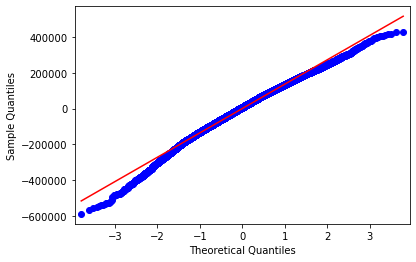

In [53]:
fig = sm.qqplot(df_train['residual'], line = 'r')

➡️ The residuals visually meet the normality requirement

## Conclusions

We believe that having an offer price that is data-driven is a very strong tool for a Buyer's Real Estate Agent and so we would recommend this Real Estate Agency continue to support the development of this tool. This could empower the already intuitive decision making that experienced Real Estate Agents engage in. 

We would recommend: 

1) Creating separate prediction tools for different types of buyers - such as those looking to flip houses, first-time home buyers and luxury home buyers  
2) Try other transformations other than One Hot Encoding for categorical variables.   
3) Experiment with inclusion of all available parameters.  
4) Build a graphical user interface where all available information can be input for easy use of prediction tool

## Edited Visualizations for Presentation

<Figure size 720x504 with 0 Axes>

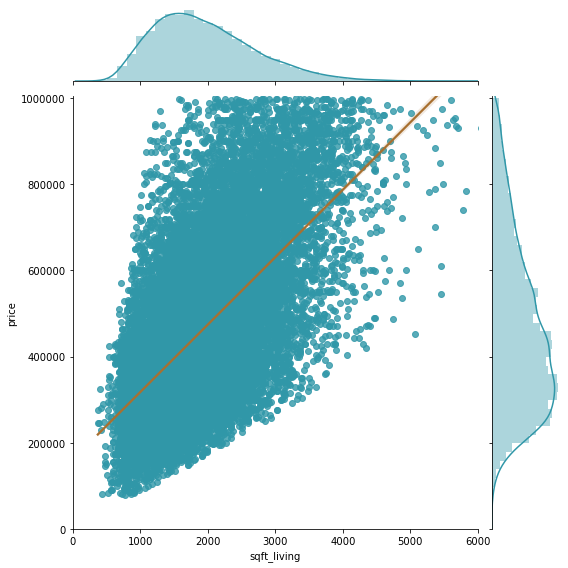

In [195]:
plt.figure(figsize=(10,7))
sns.jointplot(data=df1, x='sqft_living', y='price', kind='reg', height=8, ratio=5, xlim=(0, 6000), ylim=(0, 1005000), color="#3097a8", joint_kws={'line_kws':{'color':'#a87030'}})
#plt.savefig('images/cont_variable_sqft_vs_price.png')

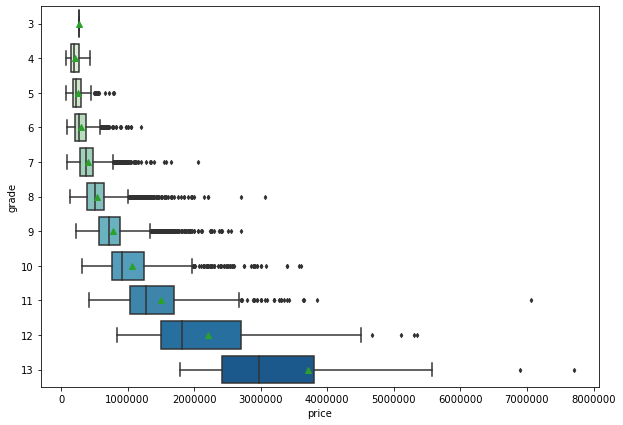

In [196]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(y = 'grade', x = 'price', data = df, width = 0.8, orient = 'h', showmeans = True, fliersize = 3, palette='GnBu')
#plt.savefig('images/cat_variable_grade_vs_price.png')
plt.show()

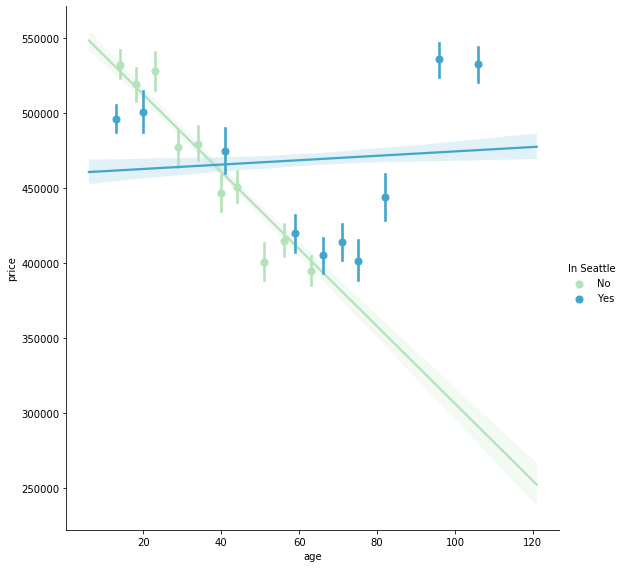

In [197]:
g=sns.lmplot(x="age", y="price", hue="in_seattle", data=df1, scatter=True, x_bins=10, size=8, palette='GnBu')
new_title = 'In Seattle'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#plt.savefig('images/age_vs_price_in_or_out_seattle.png')
plt.show()